In [1]:
import pandas as pd
import numpy as np

# ▶ 정규 분포를 이용하여 데이터 분포에 타원을 그림, 타원에서 벗어날수록 outlier
from sklearn.covariance import EllipticEnvelope
# ▶ 랜덤 데이터를 생성하는데 사용됩니다. (※ 모든 방향으로 같은 성질을 가지는 정규분포를 이용해 가상 데이터 생성 클러스링 용 가상데이터를 생성하는데 사용)
from sklearn.datasets import make_blobs

# ▶ 랜덤 데이터 생성
X, _ = make_blobs(n_samples = 100,
                  n_features = 2,
                  centers = 1,
                  random_state = 1)

# ▶ 이상치 Input
X[0,0] = 10
X[0,1] = -10

In [2]:
# ▶ EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
# ▶ The amount of contamination of the data set, i.e. the proportion of outliers in the data set
outlier_detector = EllipticEnvelope(contamination=.5)

# ▶ EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(X)

# ▶ outlier를 검출
# ▶ +1 이면 boundary 안에 들어온 값으로 정상 데이터
# ▶ -1 이면 outlier로 간주.
pred = outlier_detector.predict(X)
pred

array([-1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1])

In [3]:
outlier_detector.dist_

array([5.38914121e+02, 2.13180594e+00, 4.82227726e+00, 6.26872110e-01,
       1.05241297e+01, 7.90313406e-01, 7.56905931e-01, 1.46798888e+00,
       4.48906336e+00, 2.53938414e-01, 3.73447431e+00, 1.46511623e+00,
       7.08428750e-01, 5.07648825e+00, 1.32598385e+01, 1.29520686e+00,
       4.93475193e-01, 2.21859727e+00, 4.22855341e-01, 2.78465590e+00,
       3.46581753e-01, 2.98618509e-01, 2.04717249e-01, 2.00941197e-01,
       1.08414717e+00, 8.40533483e+00, 2.09239886e-01, 2.91348402e-01,
       9.52284998e+00, 2.26476408e+00, 6.05028555e-01, 3.11821208e+00,
       2.16572595e+00, 1.35406114e+00, 4.01400832e+00, 2.24219233e-01,
       2.01489591e+00, 4.26694812e+00, 7.50452148e-01, 1.78396839e-01,
       6.57776238e-02, 2.62856141e+00, 6.26460807e-01, 3.78949554e+00,
       8.35441386e-03, 2.73489153e-01, 1.23376104e+00, 1.08169207e+01,
       2.92043506e+00, 1.41194205e+00, 3.20027877e-01, 4.39456466e+00,
       4.02627804e-01, 1.33151376e+00, 3.90932896e-01, 3.19087893e-01,
      

In [4]:
# ▶ Raw data + Pred data
df = pd.DataFrame(X, columns=['col1', 'col2'])
df['outlier'] = pred
df.head(5)

,col1,col2,outlier
0,10.000000,-10.000000,-1
1,-0.813399,3.546974,-1
2,-3.103674,3.902024,-1
3,-1.429465,5.168501,1
4,0.868766,4.157855,-1


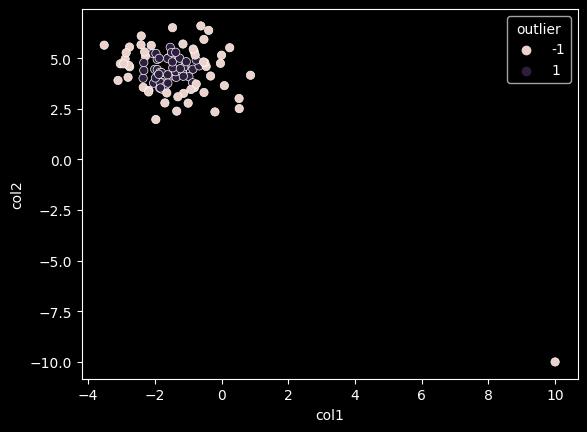

In [5]:
# ▶ Plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.scatterplot(x='col1', y='col2', hue='outlier', data=df);